In [1]:
from fastccm import PairwiseCCM, utils, ccm_utils
from fastccm.data import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statistics

In [6]:

def time_ccm_computation(X_emb, Y_emb, trials=3, device="cpu", method="simplex"):
    
    torch.cuda.empty_cache()
    ccm = PairwiseCCM(device=device, dtype="float32", compute_dtype="float32") 

    start_time = time.time()
    for _ in range(trials):
        ccm.score_matrix(X_emb, Y_emb, library_size=1600, sample_size=550, exclusion_window=30, tp=0, method=method, nbrs_num=10, theta=5, batch_size=100,clean_after=False )
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair


In [7]:
timeseries_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300, 400,500]

In [8]:
X_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 5))
Y_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 1))

In [9]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="simplex")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 5.179644ms, Time per pair = 5.179644ms
N_sys=2: Avg time = 5.226692ms, Time per pair = 1.306673ms
N_sys=5: Avg time = 9.552081ms, Time per pair = 0.382083ms
N_sys=10: Avg time = 17.101765ms, Time per pair = 0.171018ms
N_sys=15: Avg time = 20.721356ms, Time per pair = 0.092095ms
N_sys=20: Avg time = 29.036999ms, Time per pair = 0.072592ms
N_sys=30: Avg time = 48.087676ms, Time per pair = 0.053431ms
N_sys=50: Avg time = 77.100277ms, Time per pair = 0.030840ms
N_sys=100: Avg time = 164.249579ms, Time per pair = 0.016425ms
N_sys=150: Avg time = 265.217304ms, Time per pair = 0.011787ms
N_sys=200: Avg time = 392.636617ms, Time per pair = 0.009816ms
N_sys=300: Avg time = 669.948339ms, Time per pair = 0.007444ms
N_sys=400: Avg time = 1128.127337ms, Time per pair = 0.007051ms
N_sys=500: Avg time = 1708.176613ms, Time per pair = 0.006833ms


In [10]:

results_cuda = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="mps")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 111.642599ms, Time per pair = 111.642599ms
N_sys=2: Avg time = 93.034665ms, Time per pair = 23.258666ms
N_sys=5: Avg time = 101.211627ms, Time per pair = 4.048465ms
N_sys=10: Avg time = 97.288052ms, Time per pair = 0.972881ms
N_sys=15: Avg time = 106.555700ms, Time per pair = 0.473581ms
N_sys=20: Avg time = 115.145683ms, Time per pair = 0.287864ms
N_sys=30: Avg time = 127.827962ms, Time per pair = 0.142031ms
N_sys=50: Avg time = 171.879292ms, Time per pair = 0.068752ms
N_sys=100: Avg time = 262.806733ms, Time per pair = 0.026281ms
N_sys=150: Avg time = 345.354319ms, Time per pair = 0.015349ms
N_sys=200: Avg time = 465.652784ms, Time per pair = 0.011641ms
N_sys=300: Avg time = 790.481647ms, Time per pair = 0.008783ms
N_sys=400: Avg time = 1161.358039ms, Time per pair = 0.007258ms
N_sys=500: Avg time = 1799.897353ms, Time per pair = 0.007200ms


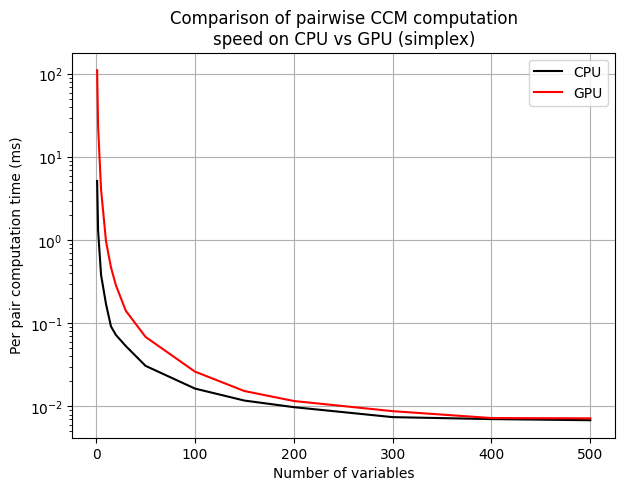

In [11]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (simplex)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [12]:
torch.cuda.get_device_name()

AssertionError: Torch not compiled with CUDA enabled